# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [94]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"] ["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | santa cruz
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | pangody
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | meadow lakes
Processing Record 15 of Set 1 | fort bliss
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | raja
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | bikenibeu village
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | bingol
Processing Reco

In [96]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [97]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.47,74,37,9.65,TF,1693043861
1,olonkinbyen,70.9221,-8.7187,6.47,97,41,8.00,SJ,1693043862
2,wailua homesteads,22.0669,-159.3780,26.44,82,40,7.72,US,1693043863
3,touros,-5.1989,-35.4608,25.47,79,59,3.80,BR,1693043759
4,grytviken,-54.2811,-36.5092,-5.08,78,85,9.71,GS,1693043865


In [98]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [99]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.47,74,37,9.65,TF,1693043861
1,olonkinbyen,70.9221,-8.7187,6.47,97,41,8.00,SJ,1693043862
2,wailua homesteads,22.0669,-159.3780,26.44,82,40,7.72,US,1693043863
3,touros,-5.1989,-35.4608,25.47,79,59,3.80,BR,1693043759
4,grytviken,-54.2811,-36.5092,-5.08,78,85,9.71,GS,1693043865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

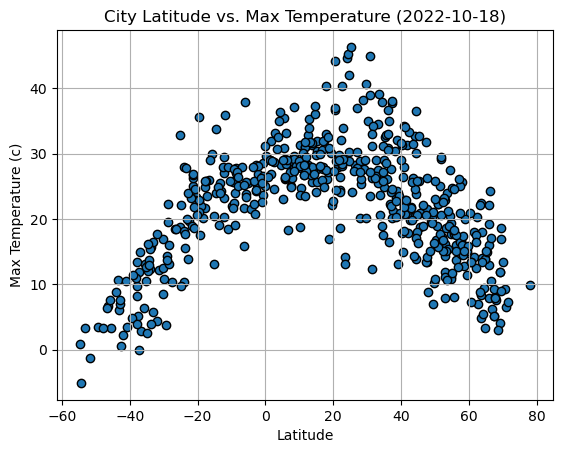

In [100]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (c)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

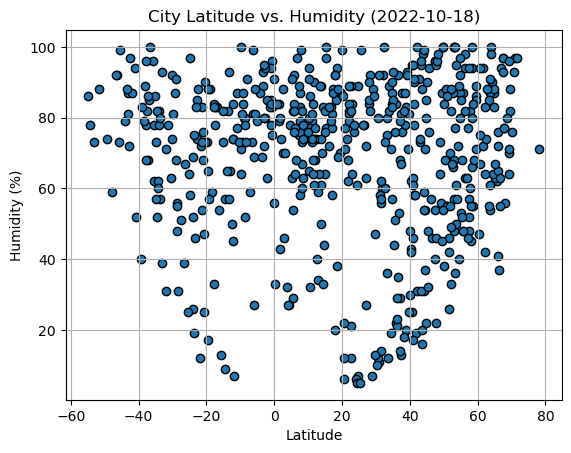

In [101]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

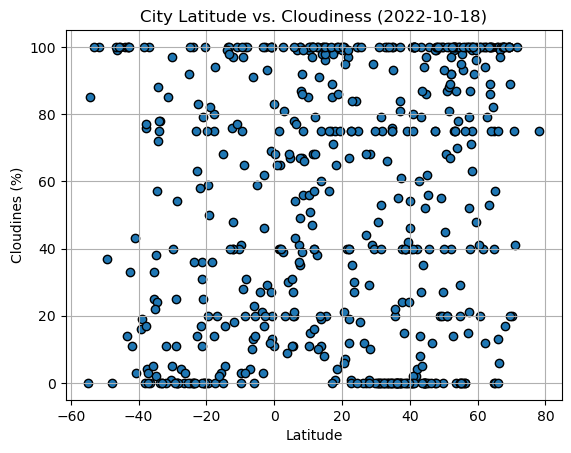

In [102]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudines (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

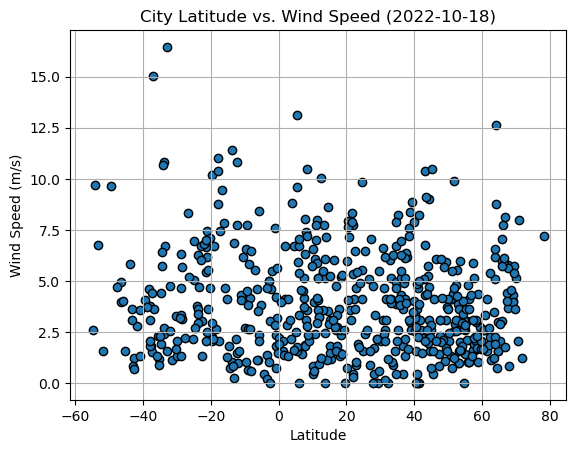

In [103]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,6.47,97,41,8.00,SJ,1693043862
2,wailua homesteads,22.0669,-159.3780,26.44,82,40,7.72,US,1693043863
6,saipan,15.1355,145.7010,27.58,100,20,1.79,MP,1693043869
8,longyearbyen,78.2186,15.6401,9.91,71,75,7.20,SJ,1693043871
9,pangody,65.8500,74.4859,12.90,62,100,7.06,RU,1693043872


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.47,74,37,9.65,TF,1693043861
3,touros,-5.1989,-35.4608,25.47,79,59,3.80,BR,1693043759
4,grytviken,-54.2811,-36.5092,-5.08,78,85,9.71,GS,1693043865
5,ushuaia,-54.8000,-68.3000,0.81,86,0,2.57,AR,1693043867
7,santa cruz,-17.8000,-63.1667,21.70,33,75,8.75,BO,1693043870


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6896788287260426


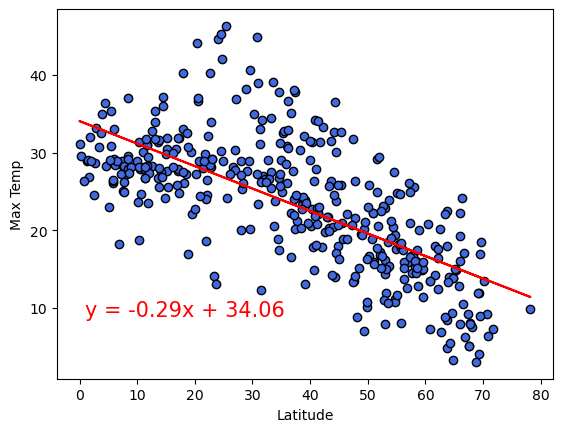

In [107]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create line equation string:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")

# Create plot:
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(1,9),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()



The Max Temperature vs. Latitude plot for cities in the Northern Hemisphere is show above. The max temperature appears a negative linear relationship with latitud, with an r-value of -0.6896, the farther north from equator is a position of a city the lower is it maximum temperature.

The r-value is:0.8313157707262117


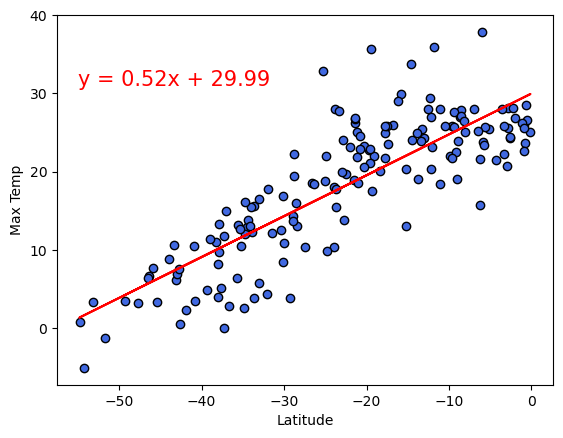

In [108]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept
# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-55,31),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()

The Max Temperature vs. Latitude plot for cities in the Southern Hemisphere is show above. The max temperature appears apositive  linear relationship with latitud, with an r-value of 0.831315, the closer to the equator is a city position the higher is its maximum temprerature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.05702277375075245


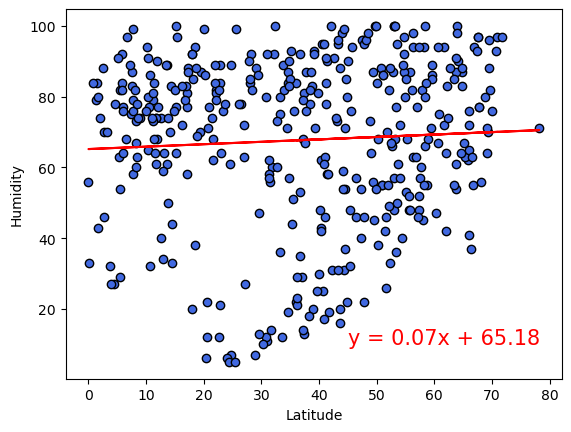

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()




The r-value is:-0.005963449000532859


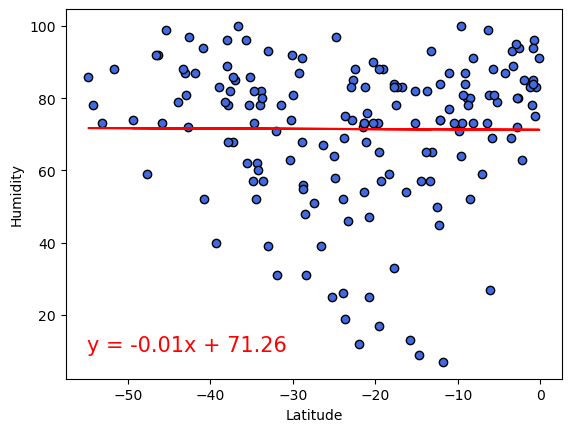

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()


The humidity vs.Latitude plot for cities in the Northern  and Southern Hemisphere is show above. The data show us no relationship between the humidity and latitud for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.09427987985544285


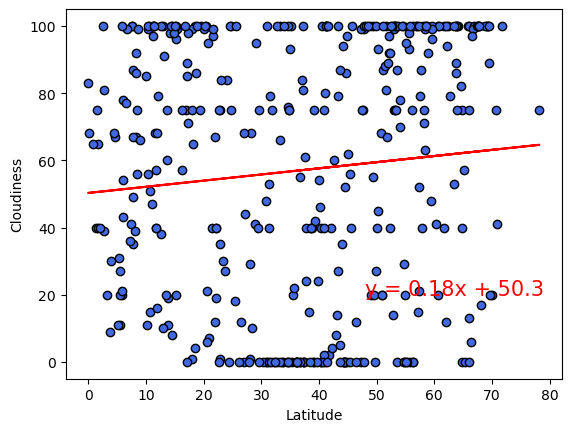

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(48,20),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()


The r-value is:-0.012573306432809003


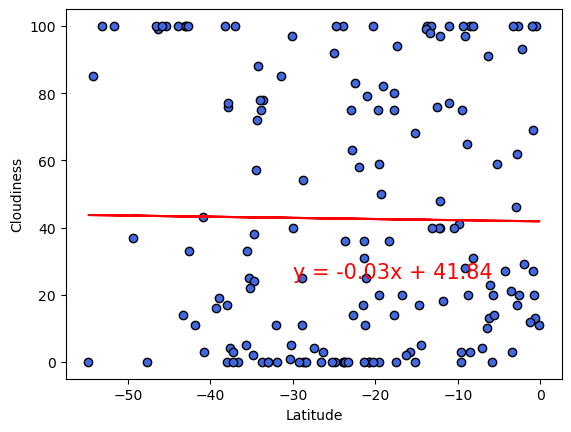

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()


The Cloudiness vs.Latitude plot for cities in the Northern  and Southern Hemisphere is show above. The data show us no relationship between the Cloudiness and latitud for both hemispheres. Cloudiness levels are widely spread across all latitudes along the whole Northern Hemisphere and the level of cloudiness is ranging from 0 to 100 independent of a latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.07656072483069949


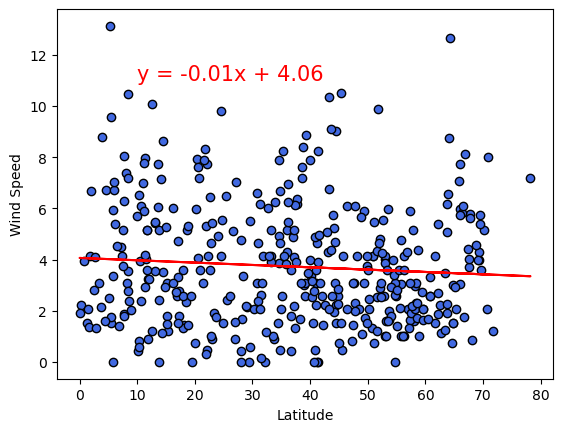

In [113]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,11),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.06407239107976433


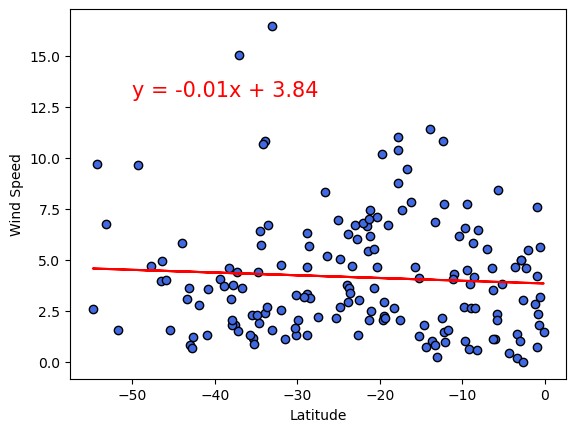

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression :
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values,edgecolors='black',color= "royalblue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,13),fontsize=15,color="red")

print(f"The r-value is:{rvalue}")
plt.show()

The wind Speed vs.Latitude plot for cities in the Northern  and Southern Hemisphere is show above. The data show us very low relationship between the wind speed and latitud for both hemispheres. the wind speed lightly increases going farther south away from the equator.
